
🔍 Pipeline structure:
  • tfidf: <class 'sklearn.feature_extraction.text.TfidfVectorizer'>
  • ensemble: <class 'sklearn.ensemble._voting.VotingClassifier'>

📨 Email 1: 🚨 Your account has been suspended. Click here to restore access!


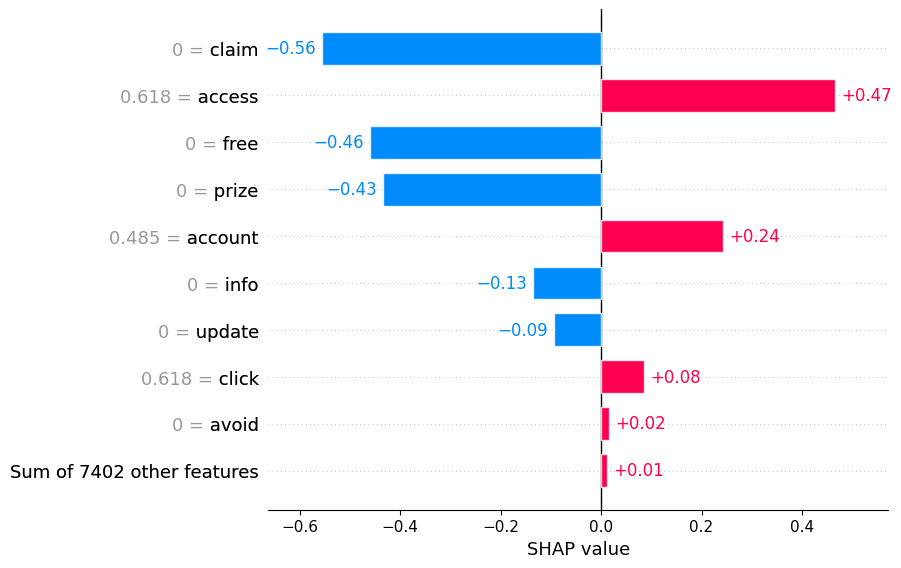


📨 Email 2: Free cäsh! Click here to claim your prize


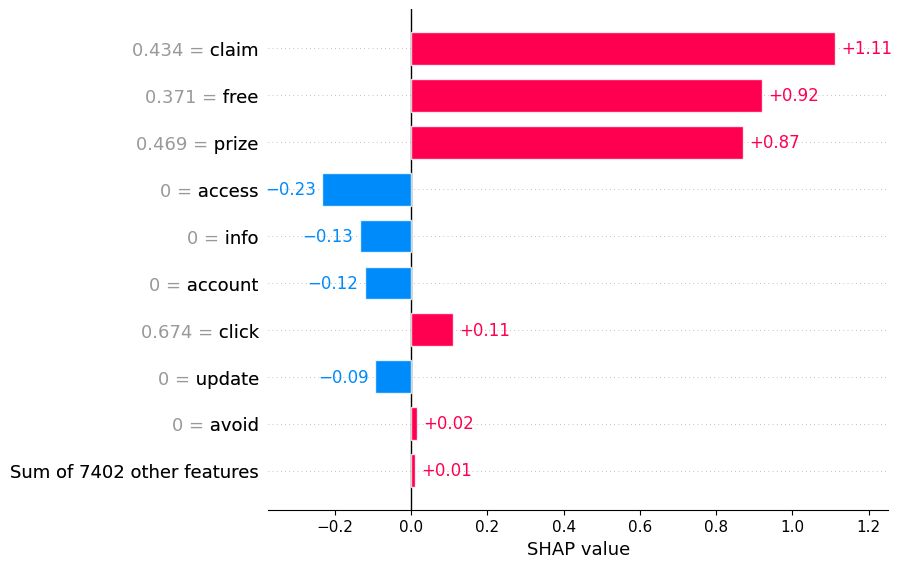


📨 Email 3: Update your payment info to avoid interruption


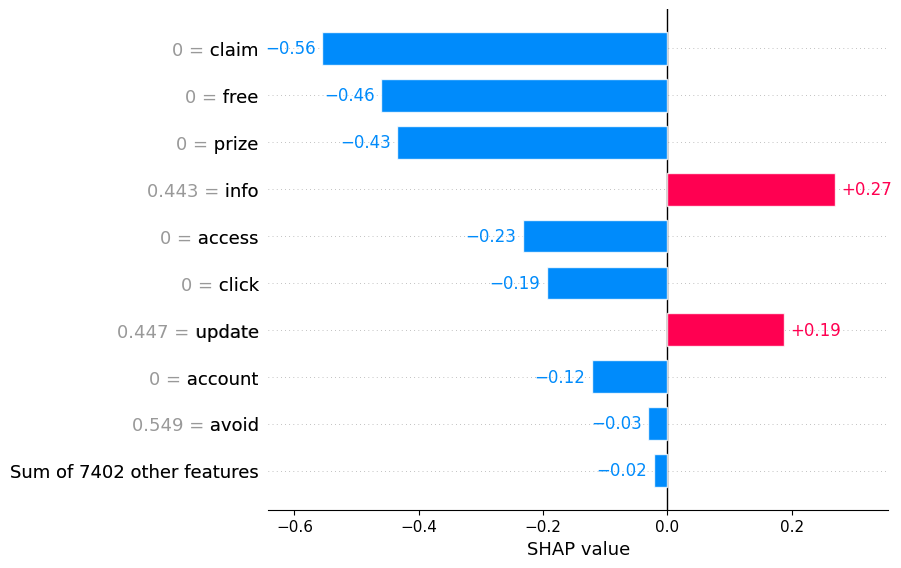

In [27]:
import shap
import joblib
import numpy as np

# Load your trained pipeline
pipeline = joblib.load("../../models/logreg_bert_ensemble.joblib")

# Show pipeline steps to identify correct keys
print("\n🔍 Pipeline structure:")
for name, step in pipeline.named_steps.items():
    print(f"  • {name}: {type(step)}")

# Automatically find vectorizer and classifier
vectorizer = None
voting_clf = None

for name, step in pipeline.named_steps.items():
    if "vectorizer" in name or "tfidf" in name:
        vectorizer = step
    elif hasattr(step, "estimators_"):
        voting_clf = step

if vectorizer is None or voting_clf is None:
    raise ValueError("❌ Could not locate vectorizer or classifier in the pipeline.")

# Choose a sub-model that supports predict_proba (e.g., LogisticRegression)
sub_model = None
for est in voting_clf.estimators_:
    if hasattr(est, "predict_proba"):
        sub_model = est
        break

if sub_model is None:
    raise ValueError("❌ No sub-model with 'predict_proba' found in VotingClassifier.")

# Emails to explain
emails_to_explain = [
    "🚨 Your account has been suspended. Click here to restore access!",
    "Free cäsh! Click here to claim your prize",
    "Update your payment info to avoid interruption"
]

# Transform emails into features
X = vectorizer.transform(emails_to_explain)

# SHAP explanation using LinearExplainer (LogisticRegression)
explainer = shap.Explainer(sub_model, X, feature_names=vectorizer.get_feature_names_out())
shap_values = explainer(X)

# Plot results
for i, email in enumerate(emails_to_explain):
    print(f"\n📨 Email {i+1}: {email}")
    shap.plots.bar(shap_values[i], show=True)
